<a href="https://colab.research.google.com/github/rtrochepy/machine_learning/blob/main/test_predictive_ml_001a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descriptive, predictive, and prescriptive analysis on a database of house features and sales prices.

**Importing Libraries**

Since **Python** is a modular software (which separates functionalities into groups called modules), it is necessary to import different libraries for most activities. In this case, we are importing:

- **pandas**: the library for handling databases
- **matplotlib** and **seaborn**: for visualizations
- **NumPy**: for manipulating vectors, matrices, and using some numerical functions
- **stats**: contains various statistical packages
- **math**: contains mathematical functions
- **sklearn**: a library for data science, from which numerous functions can be obtained, such as:
  - **train_test_split**: used to split the data into training and test subsets that will be used to train and evaluate the models.
  - **SimpleImputer**: implements imputation of missing or unrecognized data based on the information contained in the column.
  - **RandomForestRegressor**: regression model based on the random forest method.
  - **GradientBoostingRegressor**: regression model based on the Gradient Boosting method.
  - **OneHotEncoder**: implements One-Hot-Encoding, converting categorical variables into dummies.
  - **LabelEncoder**: implements Label Encoding, converting categorical variables into integer columns.
  - **StandardScaler**: implements the standardization of continuous variables.
  - **mean_absolute_error**: mean absolute error.
  - **r2_score**: calculates the R-squared.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

**Reading and Describing the Data**

The second step is to read the data and store it in a dataframe. To execute this code yourself, you will need to download the "train.csv" and "test.csv" datasets from the attachments and save them in a folder named "data" within the directory where you have this code. Make sure to write the directory path within the `read_csv` functions exactly as it is on your computer.


In [2]:
df_train = pd.read_csv('./spool/train.csv')
df_test = pd.read_csv('./spool/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: './spool/train.csv'

Let's take a closer look at these datasets.  
Notice that "train" has 81 columns because it includes the sales prices, while "test" does not have this variable, which will be constructed when we are able to predict it.

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## Define our target variable and use the `shape` function to display the number of rows and columns.

In [5]:
target = 'SalePrice'

In [6]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In "train," we have 1,460 rows, and in "test," there are 1,459. Let's look at the variables in each dataset and verify that they are the same.

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Preprocessing**

Here, we will clean the dataset for later use in a machine learning model. Let's start by removing columns that do not provide useful information.


In [9]:
df_train.drop(columns= target).columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
df_train.drop(columns='Id',inplace=True)
df_test.drop(columns='Id',inplace=True)

**Missing Data**

Let's identify the columns with a high percentage of missing data and proceed to remove them.


In [11]:
def nullcolumns(df):
    null_perc = df.isnull().mean()*100
    print(df.columns[null_perc > 60],'\n')
    df = df[df.columns[null_perc <= 60]]
    return df

df_train = nullcolumns(df_train)
df_test = nullcolumns(df_test)

print('Cantidad de columnas restantes en train',df_train.shape[1],'\n')
print('Cantidad de columnas restantes en test',df_test.shape[1])

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object') 

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object') 

Cantidad de columnas restantes en train 76 

Cantidad de columnas restantes en test 74


**Duplicates**

Let's check for any duplicate data.

In [12]:
def duplicados(df):
    df.drop_duplicates(inplace=True)
    return df

df_train = duplicados(df_train)
df_test = duplicados(df_test)

print('Cantidad de filas restantes en train',df_train.shape[0],'\n')
print('Cantidad de filas restantes en test',df_test.shape[0])

Cantidad de filas restantes en train 1460 

Cantidad de filas restantes en test 1459


**Variable Type**

In this section, we will select the variable type. This is important for determining the type of description, analysis, and transformations to be applied.


In [13]:
def tipovariable(df):
    categoricas = df.select_dtypes(exclude=np.number)
    numericas = df.select_dtypes(include=np.number)
    return categoricas, numericas

df_train_cat,df_train_num = tipovariable(df_train)
df_test_cat,df_test_num = tipovariable(df_test)

print('Cantidad respectiva de variables categóricas y numéricas',len(df_train_cat.columns),len(df_train_num.columns))

Cantidad respectiva de variables categóricas y numéricas 39 37


**Imputation of Missing Data**

Although we removed columns with a large amount of missing data, some still contain NaN values. These can cause errors in the models, so they need to be addressed. We will use the [simple imputation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) technique, implemented as **SimpleImputer** in the **sklearn** library. For numerical columns, we will use the strategy of replacing missing entries with the mean, and for categorical columns, we will replace missing entries with the most frequent value. Finally, we'll check to ensure there are no remaining null values in the dataframes.


In [14]:
def impute_nullvalues_numerical(df):
    imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
    return df

def impute_nullvalues_categorical(df):
    imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
    df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
    return df

df_train_cat = impute_nullvalues_categorical(df_train_cat)
df_train_num = impute_nullvalues_numerical(df_train_num)

df_test_cat = impute_nullvalues_categorical(df_test_cat)
df_test_num = impute_nullvalues_numerical(df_test_num)

df_train_cat.columns[df_train_cat.isna().any()]

Index([], dtype='object')

**Outliers (Numerical Variables)**

For numerical variables, we will use the interquartile range (IQR) to detect and handle outliers. We will construct a table that contains information on the first and third quartiles, the interquartile range, and the number of upper and lower outliers, which we will consider as values that are more than 1.5 times the IQR above the third quartile or below the first quartile, respectively.

We have several options for handling these extreme values. One option is to remove them; however, doing so would leave us with only about a third of the data. This is very little data, and in fact, our dataset is not very large to begin with, so we will apply another technique: we will replace the outliers with the values "upper limit = third quartile + 1.5*IQR" and "lower limit = first quartile - 1.5*IQR" as appropriate.

*Note: As an exercise, uncomment the part of the code that removes outliers and print the number of rows left in the dataset. When you move on to the Machine Learning models, you can compare the results of removing outliers versus the results using the proposed technique.*


In [15]:
def detectar_outliers_num(df):

    riq = pd.DataFrame(index=df.columns)
    indices = []
    for col in df.columns:
        riq.loc[col,'primer_cuartil'] = np.percentile(df[col],25)
        riq.loc[col,'tercer_cuartil'] = np.percentile(df[col],75)
        riq.loc[col,'iqr'] = stats.iqr(df[col])
        lim_sup = riq.loc[col,'tercer_cuartil']+riq.loc[col,'iqr']*1.5
        lim_inf = riq.loc[col,'primer_cuartil']-riq.loc[col,'iqr']*1.5
        riq.loc[col,'outliers_sup'] = len(df[df[col]>lim_sup])
        riq.loc[col,'outliers_inf'] = len(df[df[col]<lim_inf])
#        indices += list(df[(df[col]>lim_sup) | (df[col]<lim_inf)].index)
        for i in df.index:
            if  df.loc[i,col] > lim_sup:
                df.loc[i,col] = lim_sup
            elif df.loc[i,col] < lim_inf:
                  df.loc[i,col] = lim_inf
#    df.drop(indices,inplace=True)
    return df, riq

df_train_num, informacion_train = detectar_outliers_num(df_train_num)
df_test_num, informacion_test = detectar_outliers_num(df_test_num)

print('La información sobre la cantidad de outliers la podemos ver en la tabla:','\n','\n', informacion_train,'\n')
# print('La cantidad de filas que quedaron en el dataframe:','\n','\n',df_train_num.shape[0])

La información sobre la cantidad de outliers la podemos ver en la tabla: 
 
                primer_cuartil  tercer_cuartil       iqr  outliers_sup  \
MSSubClass              20.00           70.00     50.00         103.0   
LotFrontage             60.00           79.00     19.00          58.0   
LotArea               7553.50        11601.50   4048.00          67.0   
OverallQual              5.00            7.00      2.00           0.0   
OverallCond              5.00            6.00      1.00          94.0   
YearBuilt             1954.00         2000.00     46.00           0.0   
YearRemodAdd          1967.00         2004.00     37.00           0.0   
MasVnrArea               0.00          164.25    164.25          98.0   
BsmtFinSF1               0.00          712.25    712.25           7.0   
BsmtFinSF2               0.00            0.00      0.00         167.0   
BsmtUnfSF              223.00          808.00    585.00          29.0   
TotalBsmtSF            795.75         1298.25  

**Outliers in Categorical Variables**

Outliers can also appear in categorical variables, such as values that are unique within a column. Let's look at the entries in each column and how often they are repeated. Next, we will replace values that occur less than five times with the mode of each column.


In [16]:
def detectar_outliers_cat(df):
    for col in df.columns:
        indices = list(df_train_cat[col].value_counts()[df_train_cat[col].value_counts()<5].index)
        moda = df_train_cat[col].mode()[0]
        for i in df_train_cat.index:
            if df_train_cat.loc[i,col] in indices:
                df_train_cat.loc[i,col] = moda
    return df

df_train_cat = detectar_outliers_cat(df_train_cat)
df_test_cat = detectar_outliers_cat(df_test_cat)

**Description and Visualizations**

With the "describe" function, we can find the descriptive statistics of the dataframes.

In [17]:
df_train_cat.describe().transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      1   AllPub  1460
LotConfig      1460      4   Inside  1056
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     24    NAmes   227
Condition1     1460      8     Norm  1262
Condition2     1460      2     Norm  1454
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      5    Gable  1143
RoofMatl       1460      4  CompShg  1438
Exterior1st    1460     10  VinylSd   522
Exterior2nd    1460     13  VinylSd   509
MasVnrType     1460      3  BrkFace  1317
ExterQual      1460      4       TA   906
ExterCond      1460      3       TA  1286
Foundation     1460      5    PConc   650
BsmtQual       1460      4       TA   686
BsmtCond       1460      3       TA  1350
BsmtExposure   1460      4       No   991
BsmtFinType1   1460      6      Unf   467
BsmtFinType2   1460      6      Unf  1294
Heating        1460      3     GasA  1435
HeatingQC      1460      4       Ex   742
CentralAir     1460      2        Y  1365
Electrical     1460      3    SBrkr  1339
KitchenQual    1460      4       TA   735
Functional     1460      6      Typ  1361
FireplaceQu    1460      5       Gd  1070
GarageType     1460      6   Attchd   951
GarageFinish   1460      3      Unf   686
GarageQual     1460      3       TA  1398
GarageCond     1460      4       TA  1409
PavedDrive     1460      3        Y  1340
SaleType       1460      6       WD  1276
SaleCondition  1460      5   Normal  1202

In [18]:
df_train_num.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      55.085616     37.508183     20.0      20.00   
LotFrontage    1460.0      69.276671     17.235602     31.5      60.00   
LotArea        1460.0    9647.388014   3594.356399   1481.5    7553.50   
OverallQual    1460.0       6.100685      1.378430      2.0       5.00   
OverallCond    1460.0       5.543493      0.963696      3.5       5.00   
YearBuilt      1460.0    1971.299315     30.108397   1885.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0      89.974474    133.856899      0.0       0.00   
BsmtFinSF1     1460.0     439.997517    433.219435      0.0       0.00   
BsmtFinSF2     1460.0       0.000000      0.000000      0.0       0.00   
BsmtUnfSF      1460.0     563.777740    431.710214      0.0     223.00   
TotalBsmtSF    1460.0    1050.254795    397.937878     42.0     795.75   
1stFlrSF       1460.0    1157.018151    362.583002    334.0     882.00   
2ndFlrSF       1460.0     346.789041    435.791621      0.0       0.00   
LowQualFinSF   1460.0       0.000000      0.000000      0.0       0.00   
GrLivArea      1460.0    1503.735873    481.375641    334.0    1129.50   
BsmtFullBath   1460.0       0.425000      0.517373      0.0       0.00   
BsmtHalfBath   1460.0       0.000000      0.000000      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.851712      0.759516      0.5       2.00   
KitchenAbvGr   1460.0       1.000000      0.000000      1.0       1.00   
TotRmsAbvGrd   1460.0       6.487671      1.541916      2.0       5.00   
Fireplaces     1460.0       0.611301      0.638959      0.0       0.00   
GarageYrBlt    1460.0    1978.508561     23.986908   1903.5    1962.00   
GarageCars     1460.0       1.765411      0.742753      0.0       1.00   
GarageArea     1460.0     470.670719    207.105729      0.0     334.50   
WoodDeckSF     1460.0      91.806849    116.658120      0.0       0.00   
OpenPorchSF    1460.0      42.603425     52.501584      0.0       0.00   
EnclosedPorch  1460.0       0.000000      0.000000      0.0       0.00   
3SsnPorch      1460.0       0.000000      0.000000      0.0       0.00   
ScreenPorch    1460.0       0.000000      0.000000      0.0       0.00   
PoolArea       1460.0       0.000000      0.000000      0.0       0.00   
MiscVal        1460.0       0.000000      0.000000      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  177331.526370  67205.835915  34900.0  129975.00   

                         50%        75%         max  
MSSubClass         50.000000      70.00     145.000  
LotFrontage        70.049958      79.00     107.500  
LotArea          9478.500000   11601.50   17673.500  
OverallQual         6.000000       7.00      10.000  
OverallCond         5.000000       6.00       7.500  
YearBuilt        1973.000000    2000.00    2010.000  
YearRemodAdd     1994.000000    2004.00    2010.000  
MasVnrArea          0.000000     164.25     410.625  
BsmtFinSF1        383.500000     712.25    1780.625  
BsmtFinSF2          0.000000       0.00       0.000  
BsmtUnfSF         477.500000     808.00    1685.500  
TotalBsmtSF       991.500000    1298.25    2052.000  
1stFlrSF         1087.000000    1391.25    2155.125  
2ndFlrSF            0.000000     728.00    1820.000  
LowQualFinSF        0.000000       0.00       0.000  
GrLivArea        1464.000000    1776.75    2747.625  
BsmtFullBath        0.000000       1.00       2.500  
BsmtHalfBath        0.000000       0.00       0.000  
FullBath            2.000000       2.00       3.000  
HalfBath            0.000000       1.00       2.000  
BedroomAbvGr        3.000000       3.00       4.500  
KitchenAbvGr   

For the visualizations, let's remove the "target" variable:

In [19]:
df_train_num.drop(columns=target,inplace=True)

First, we'll use the **pairplot** function from seaborn, which draws a matrix of plots. The diagonal shows histograms or density plots of the columns, while the rest of the positions display scatter plots of the columns in pairs. Due to the size of our dataset, we'll use multiple plots.

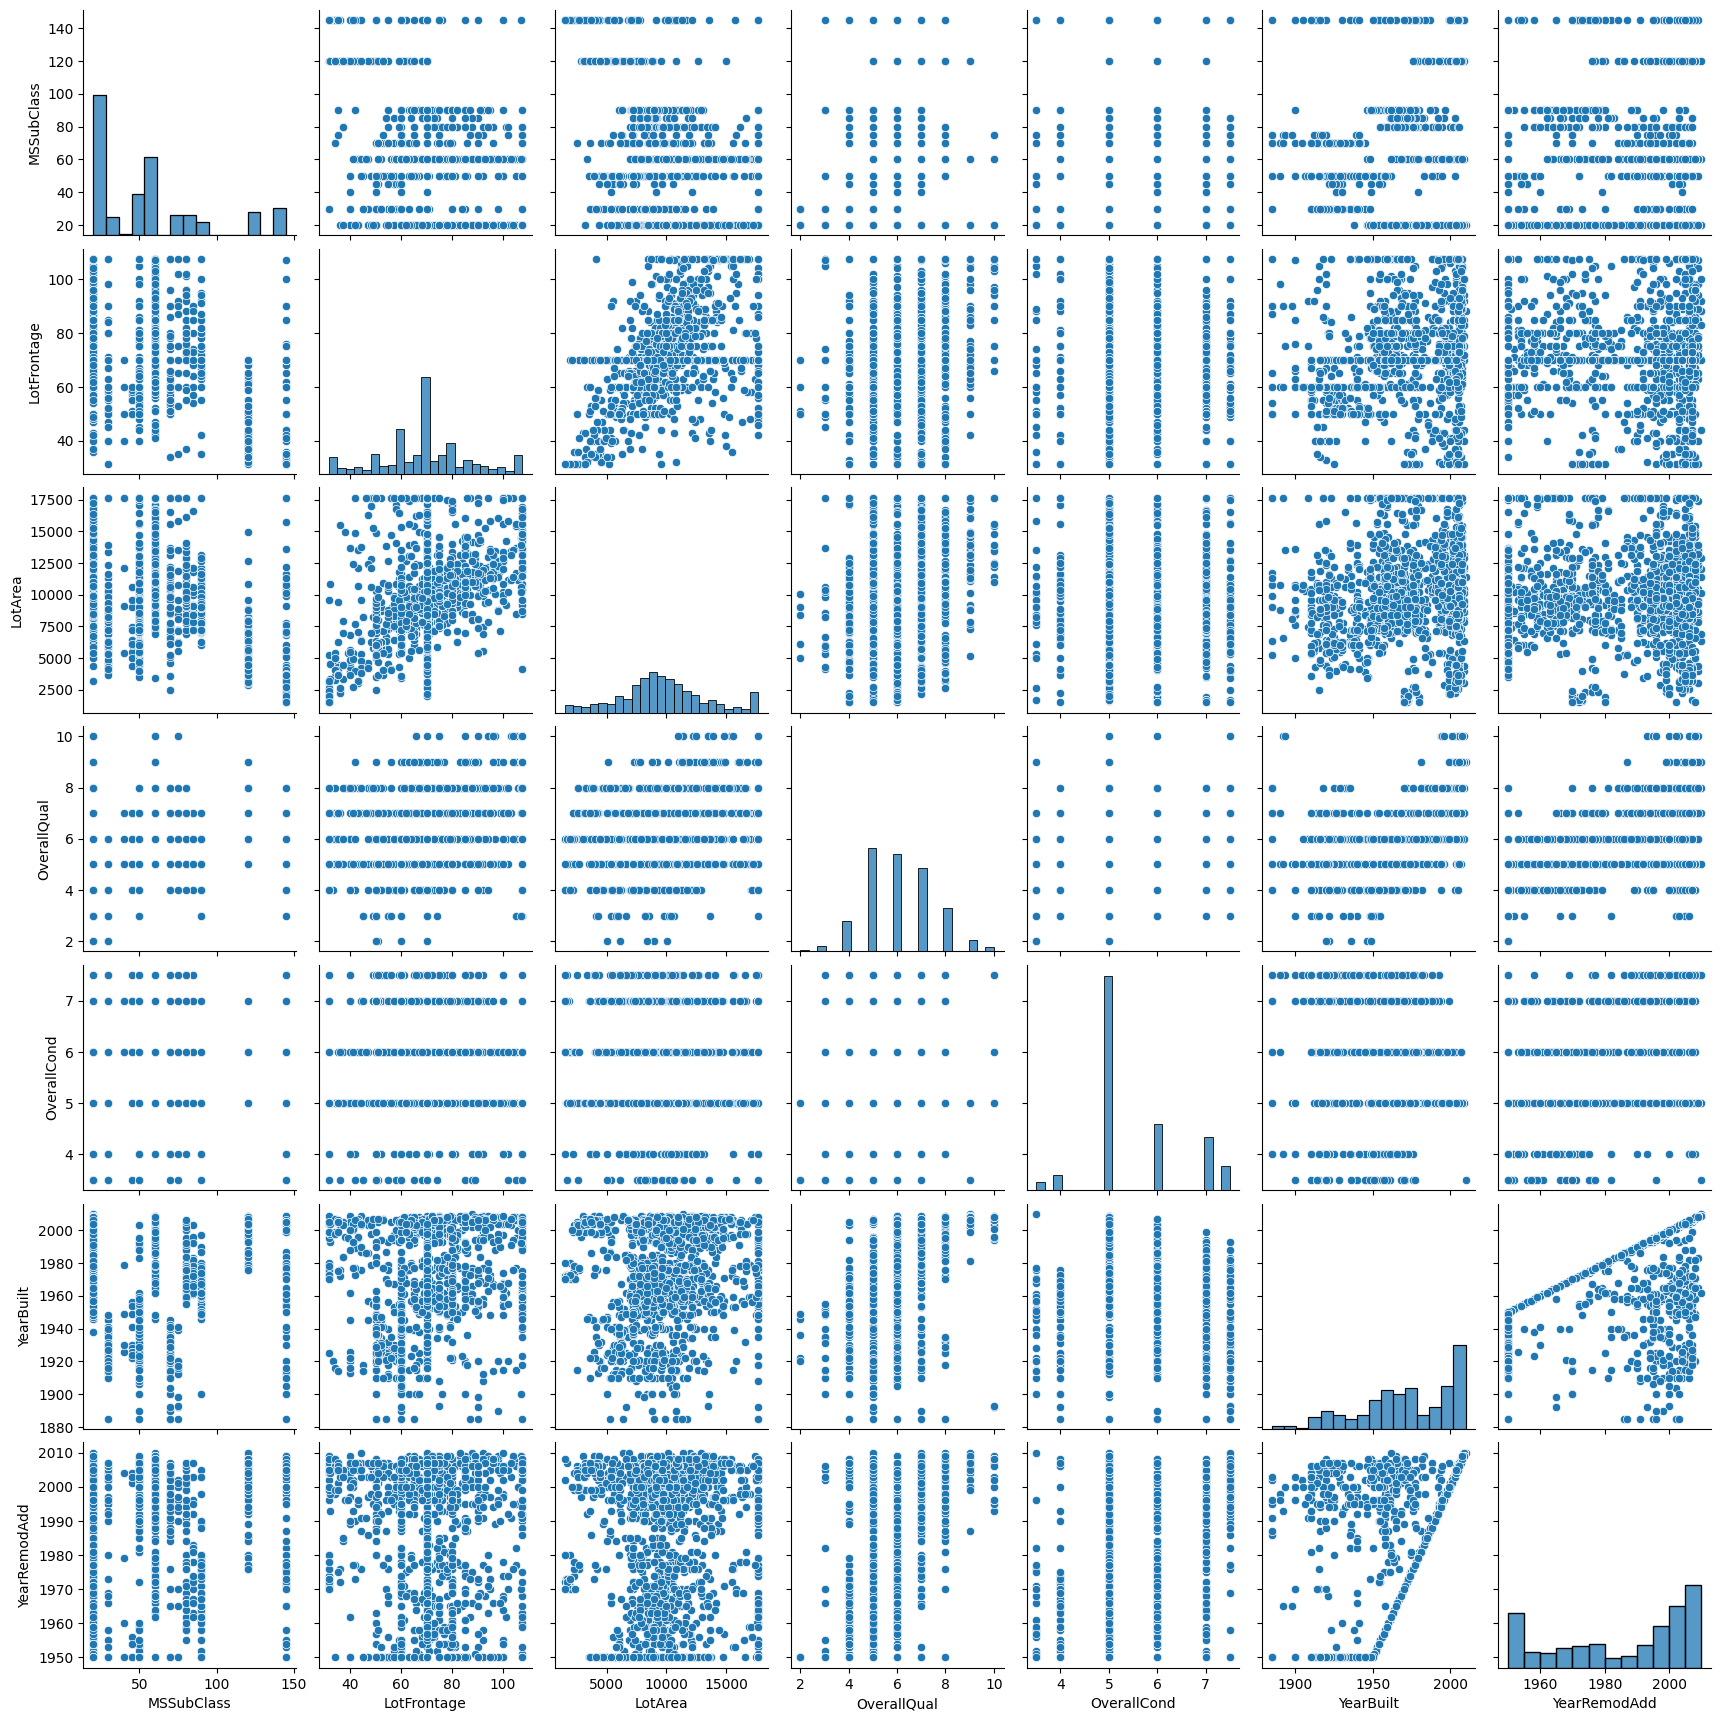

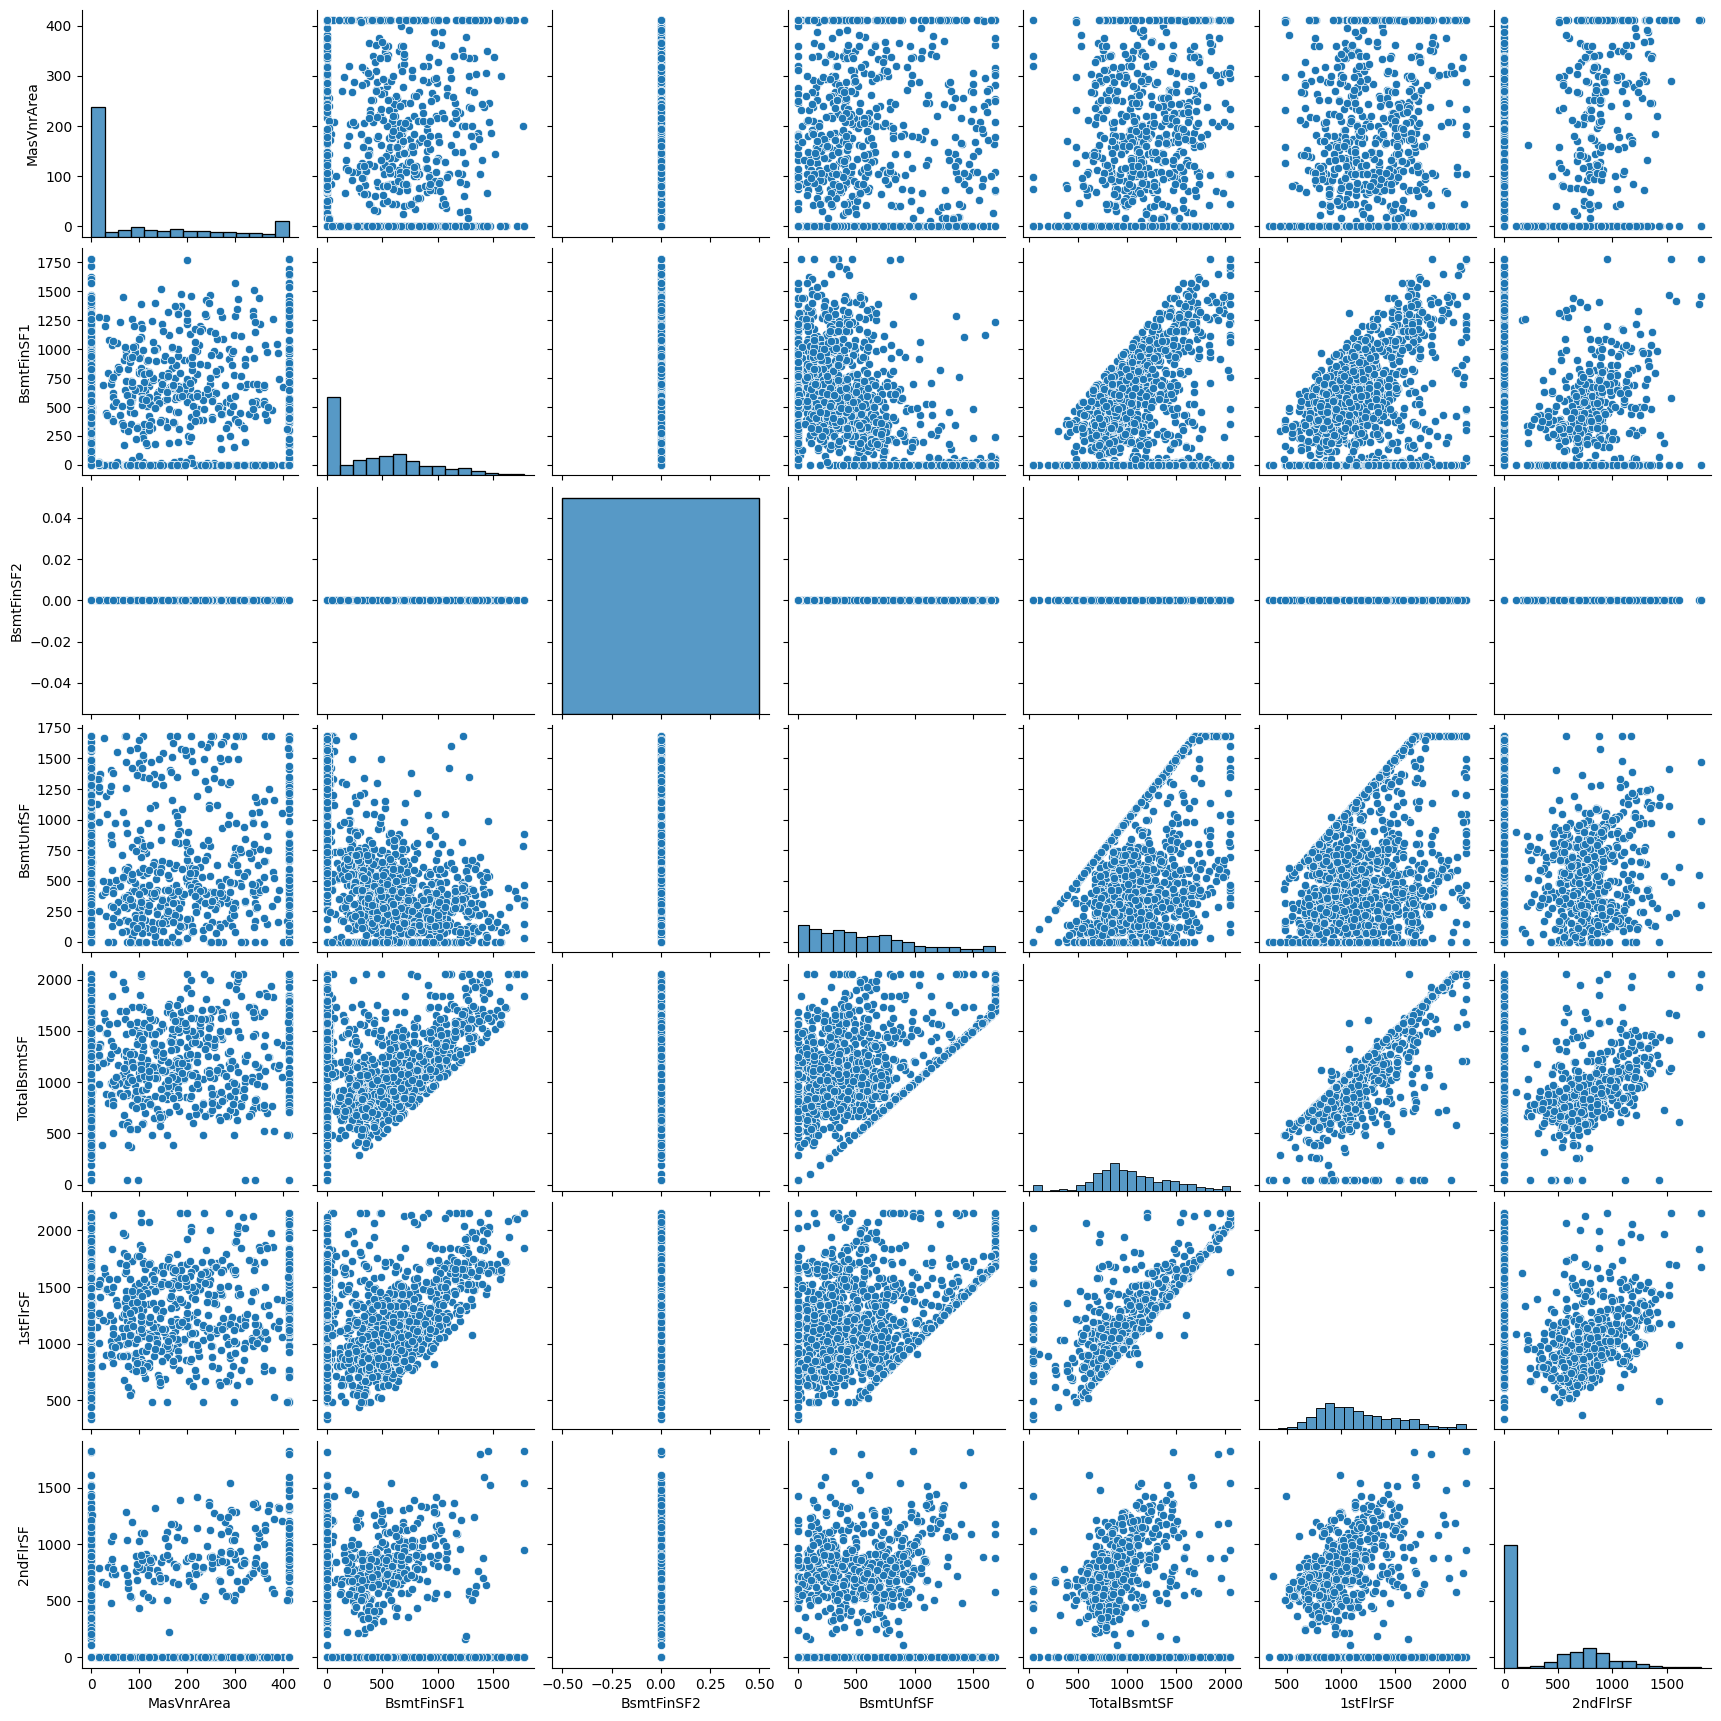

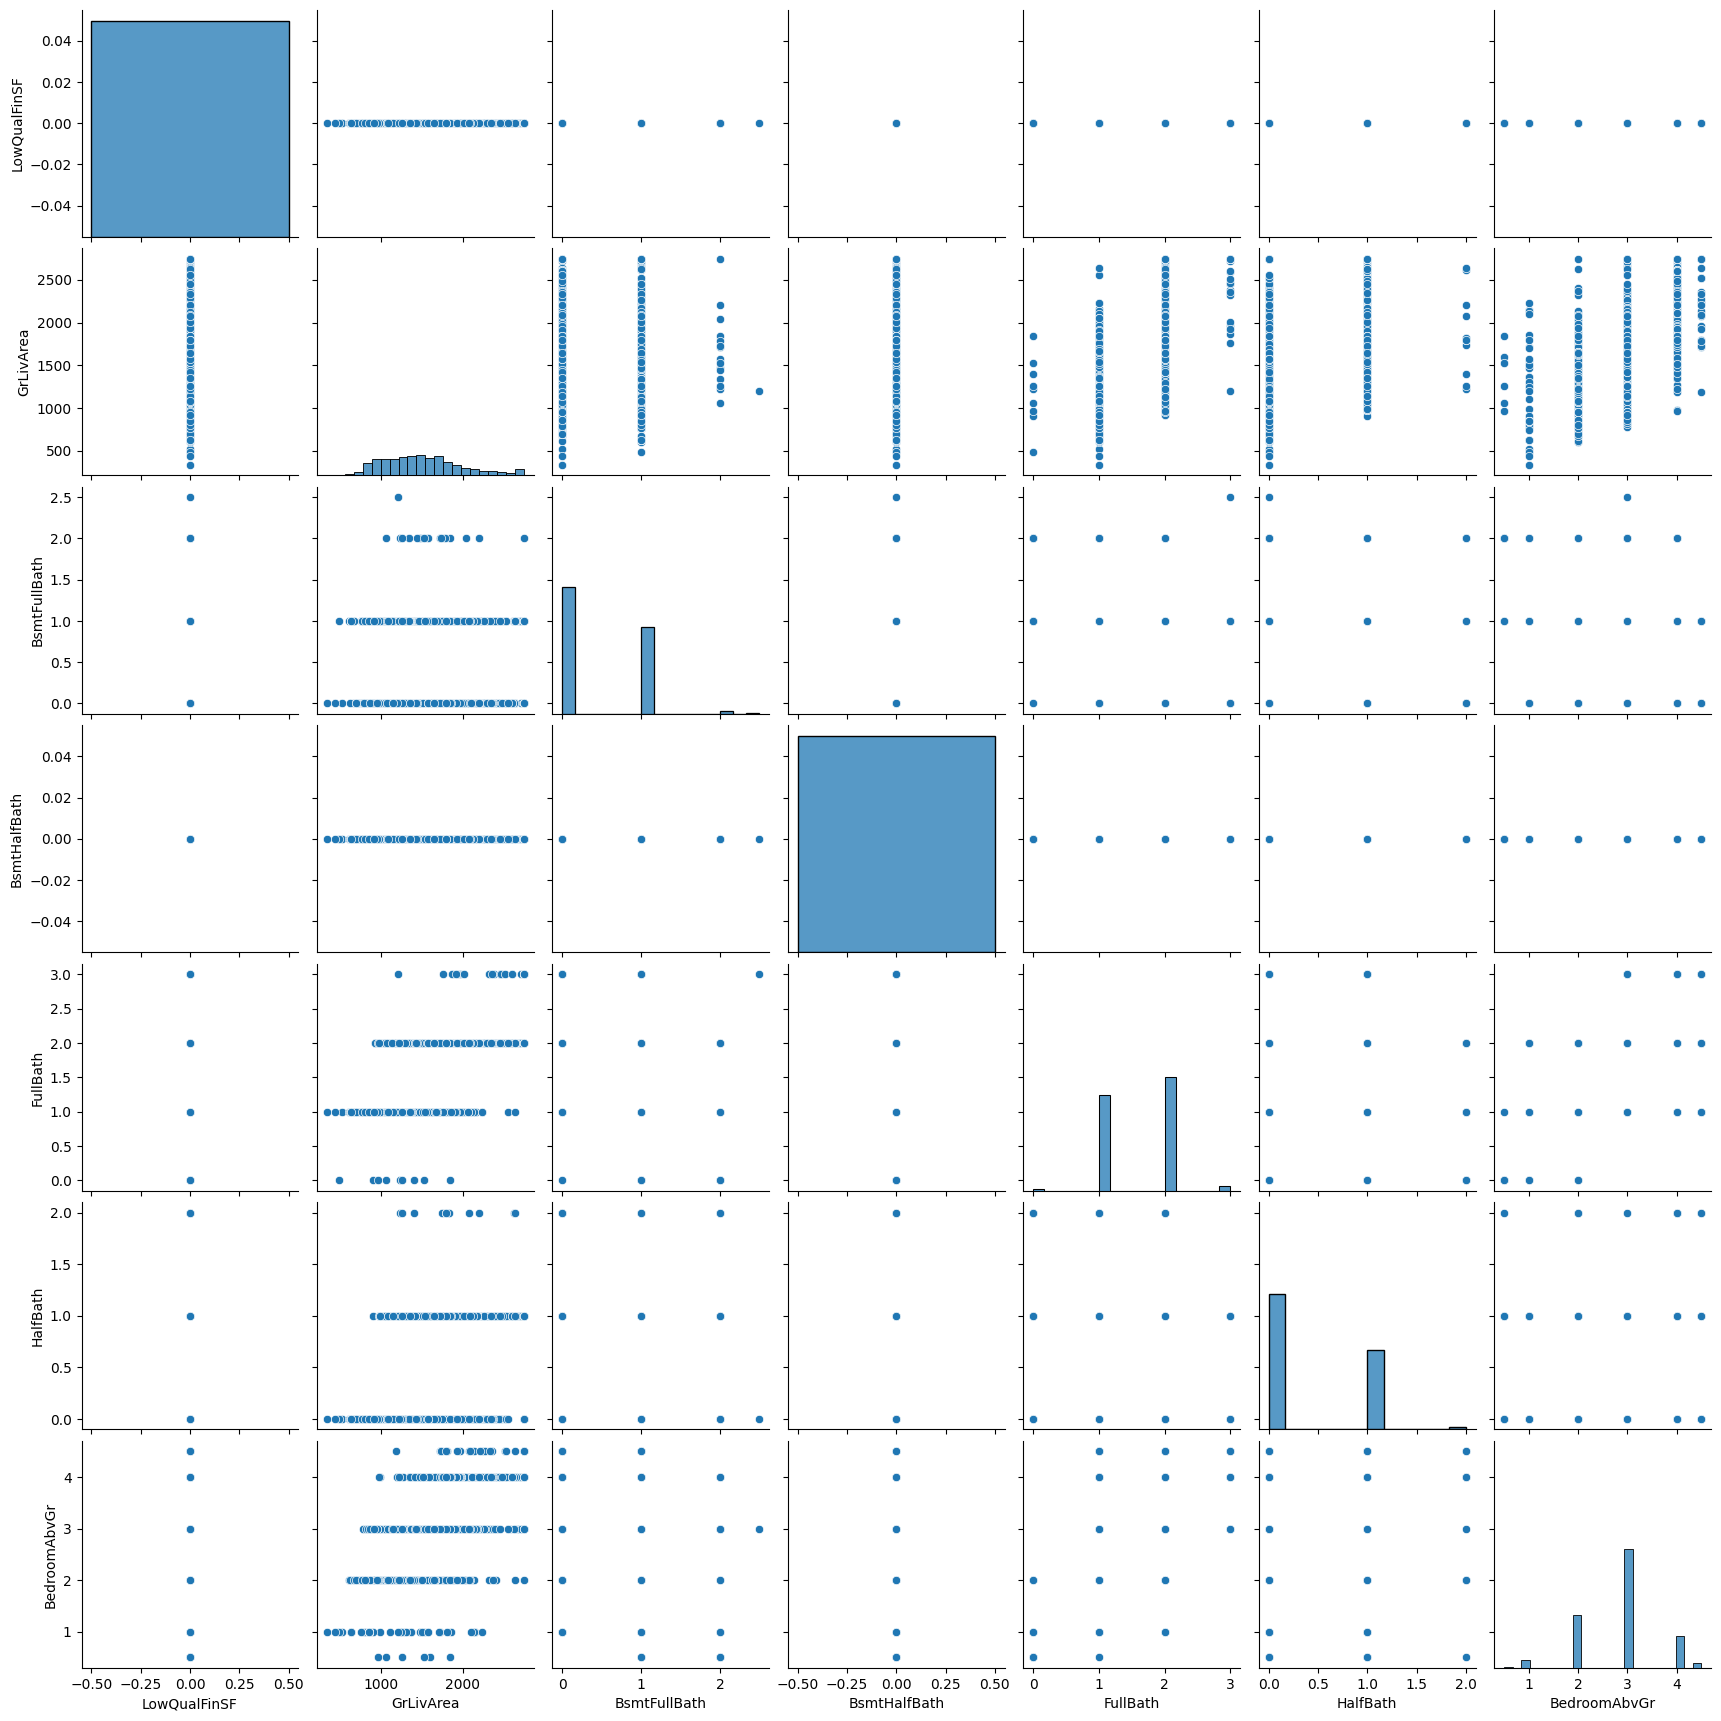

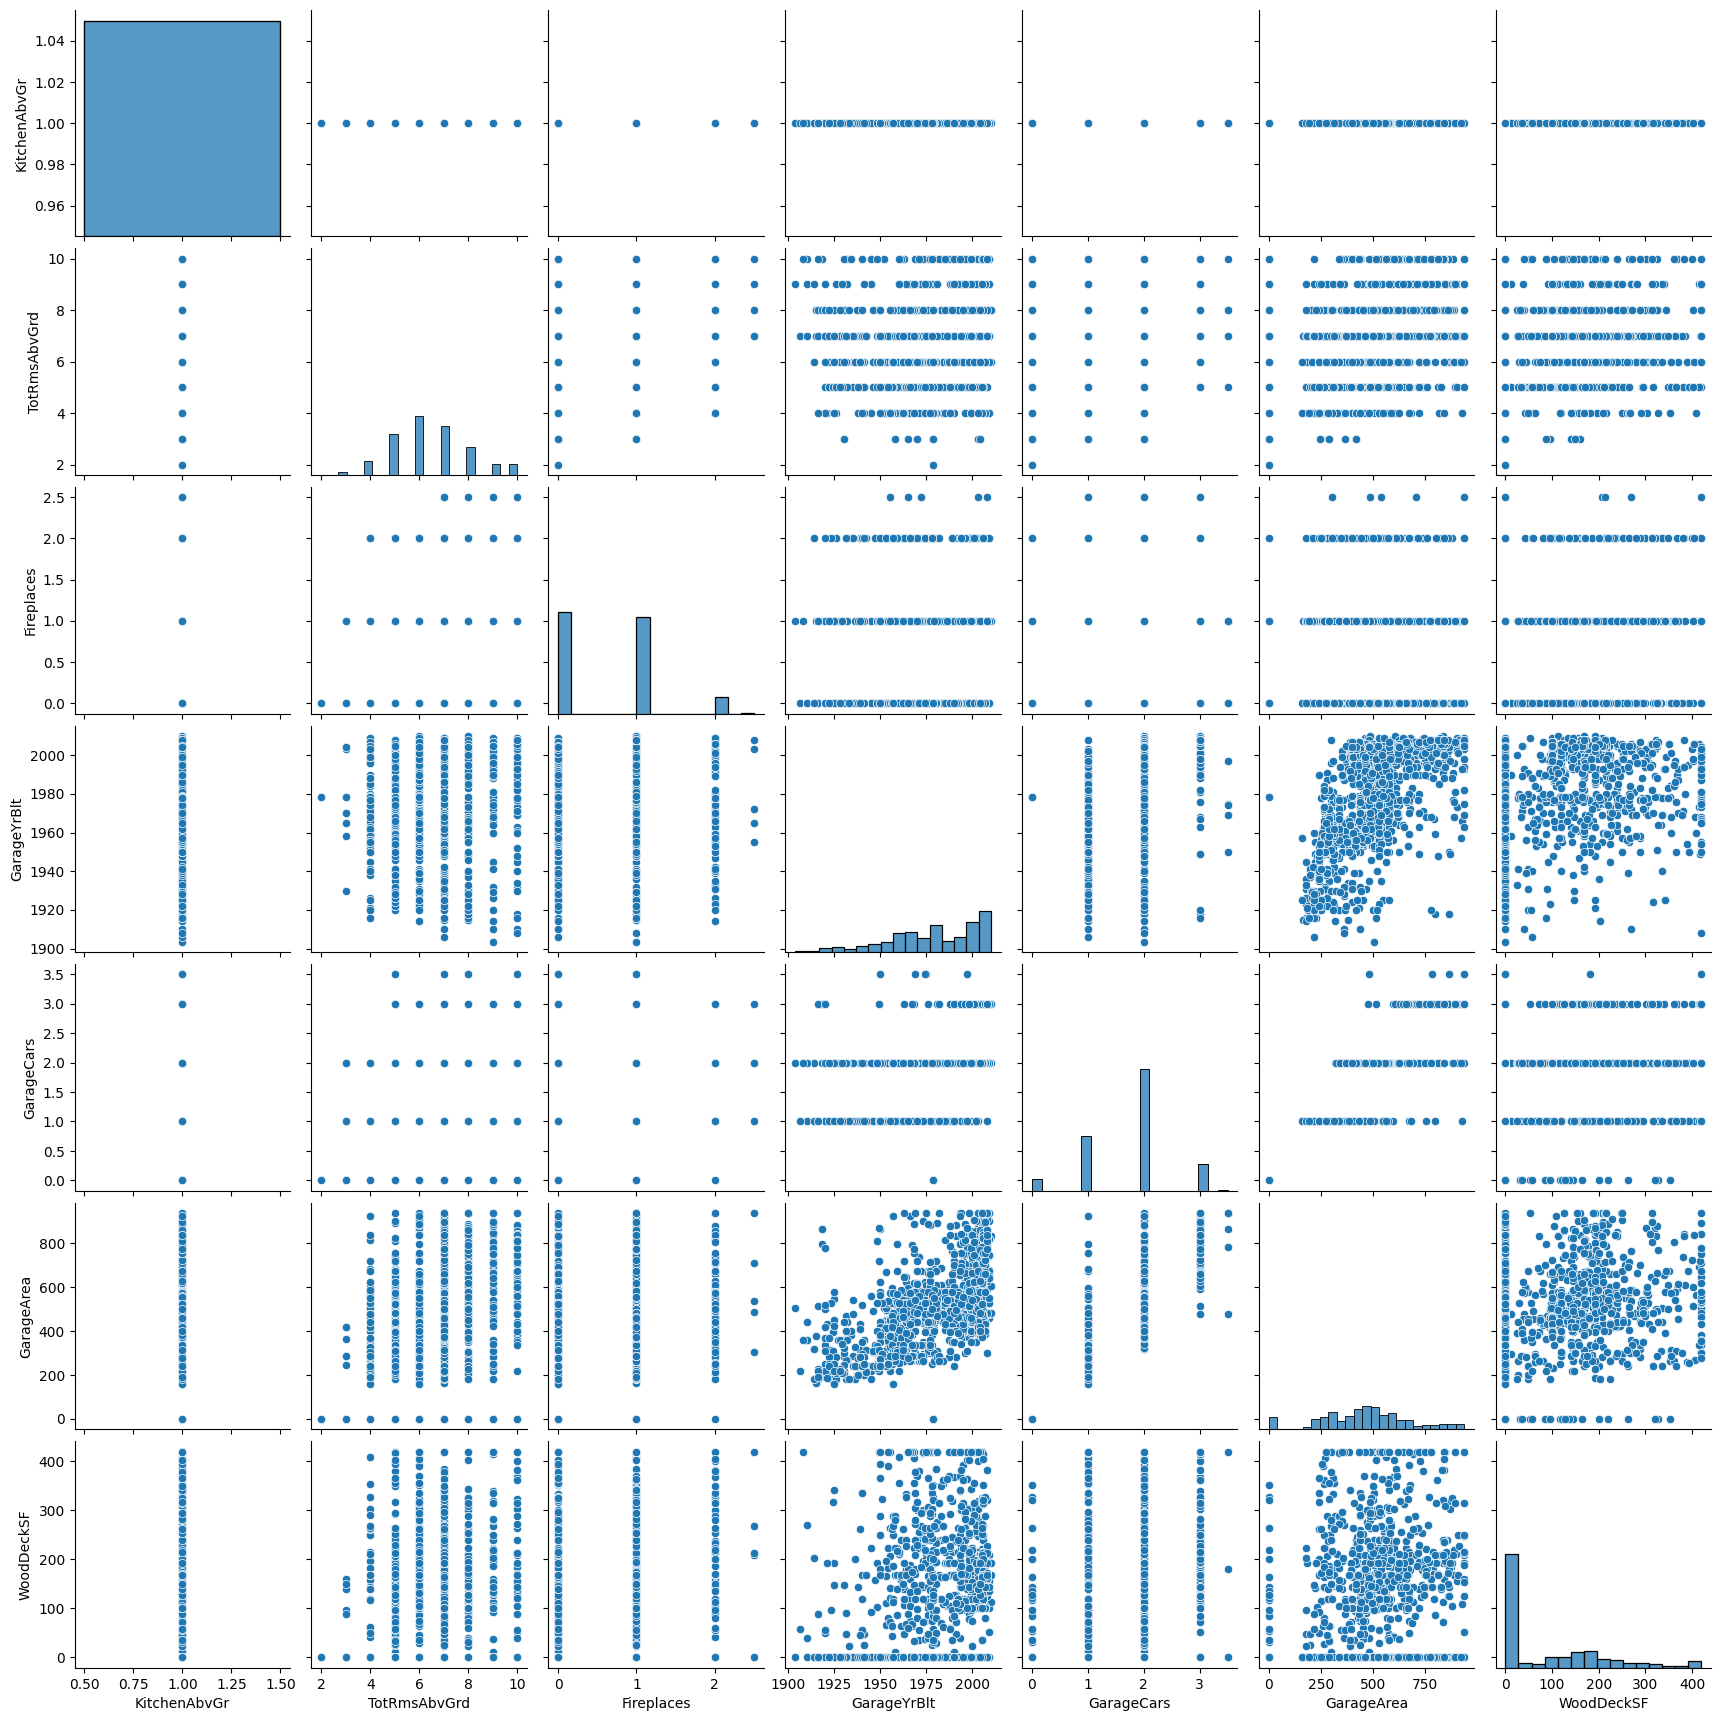

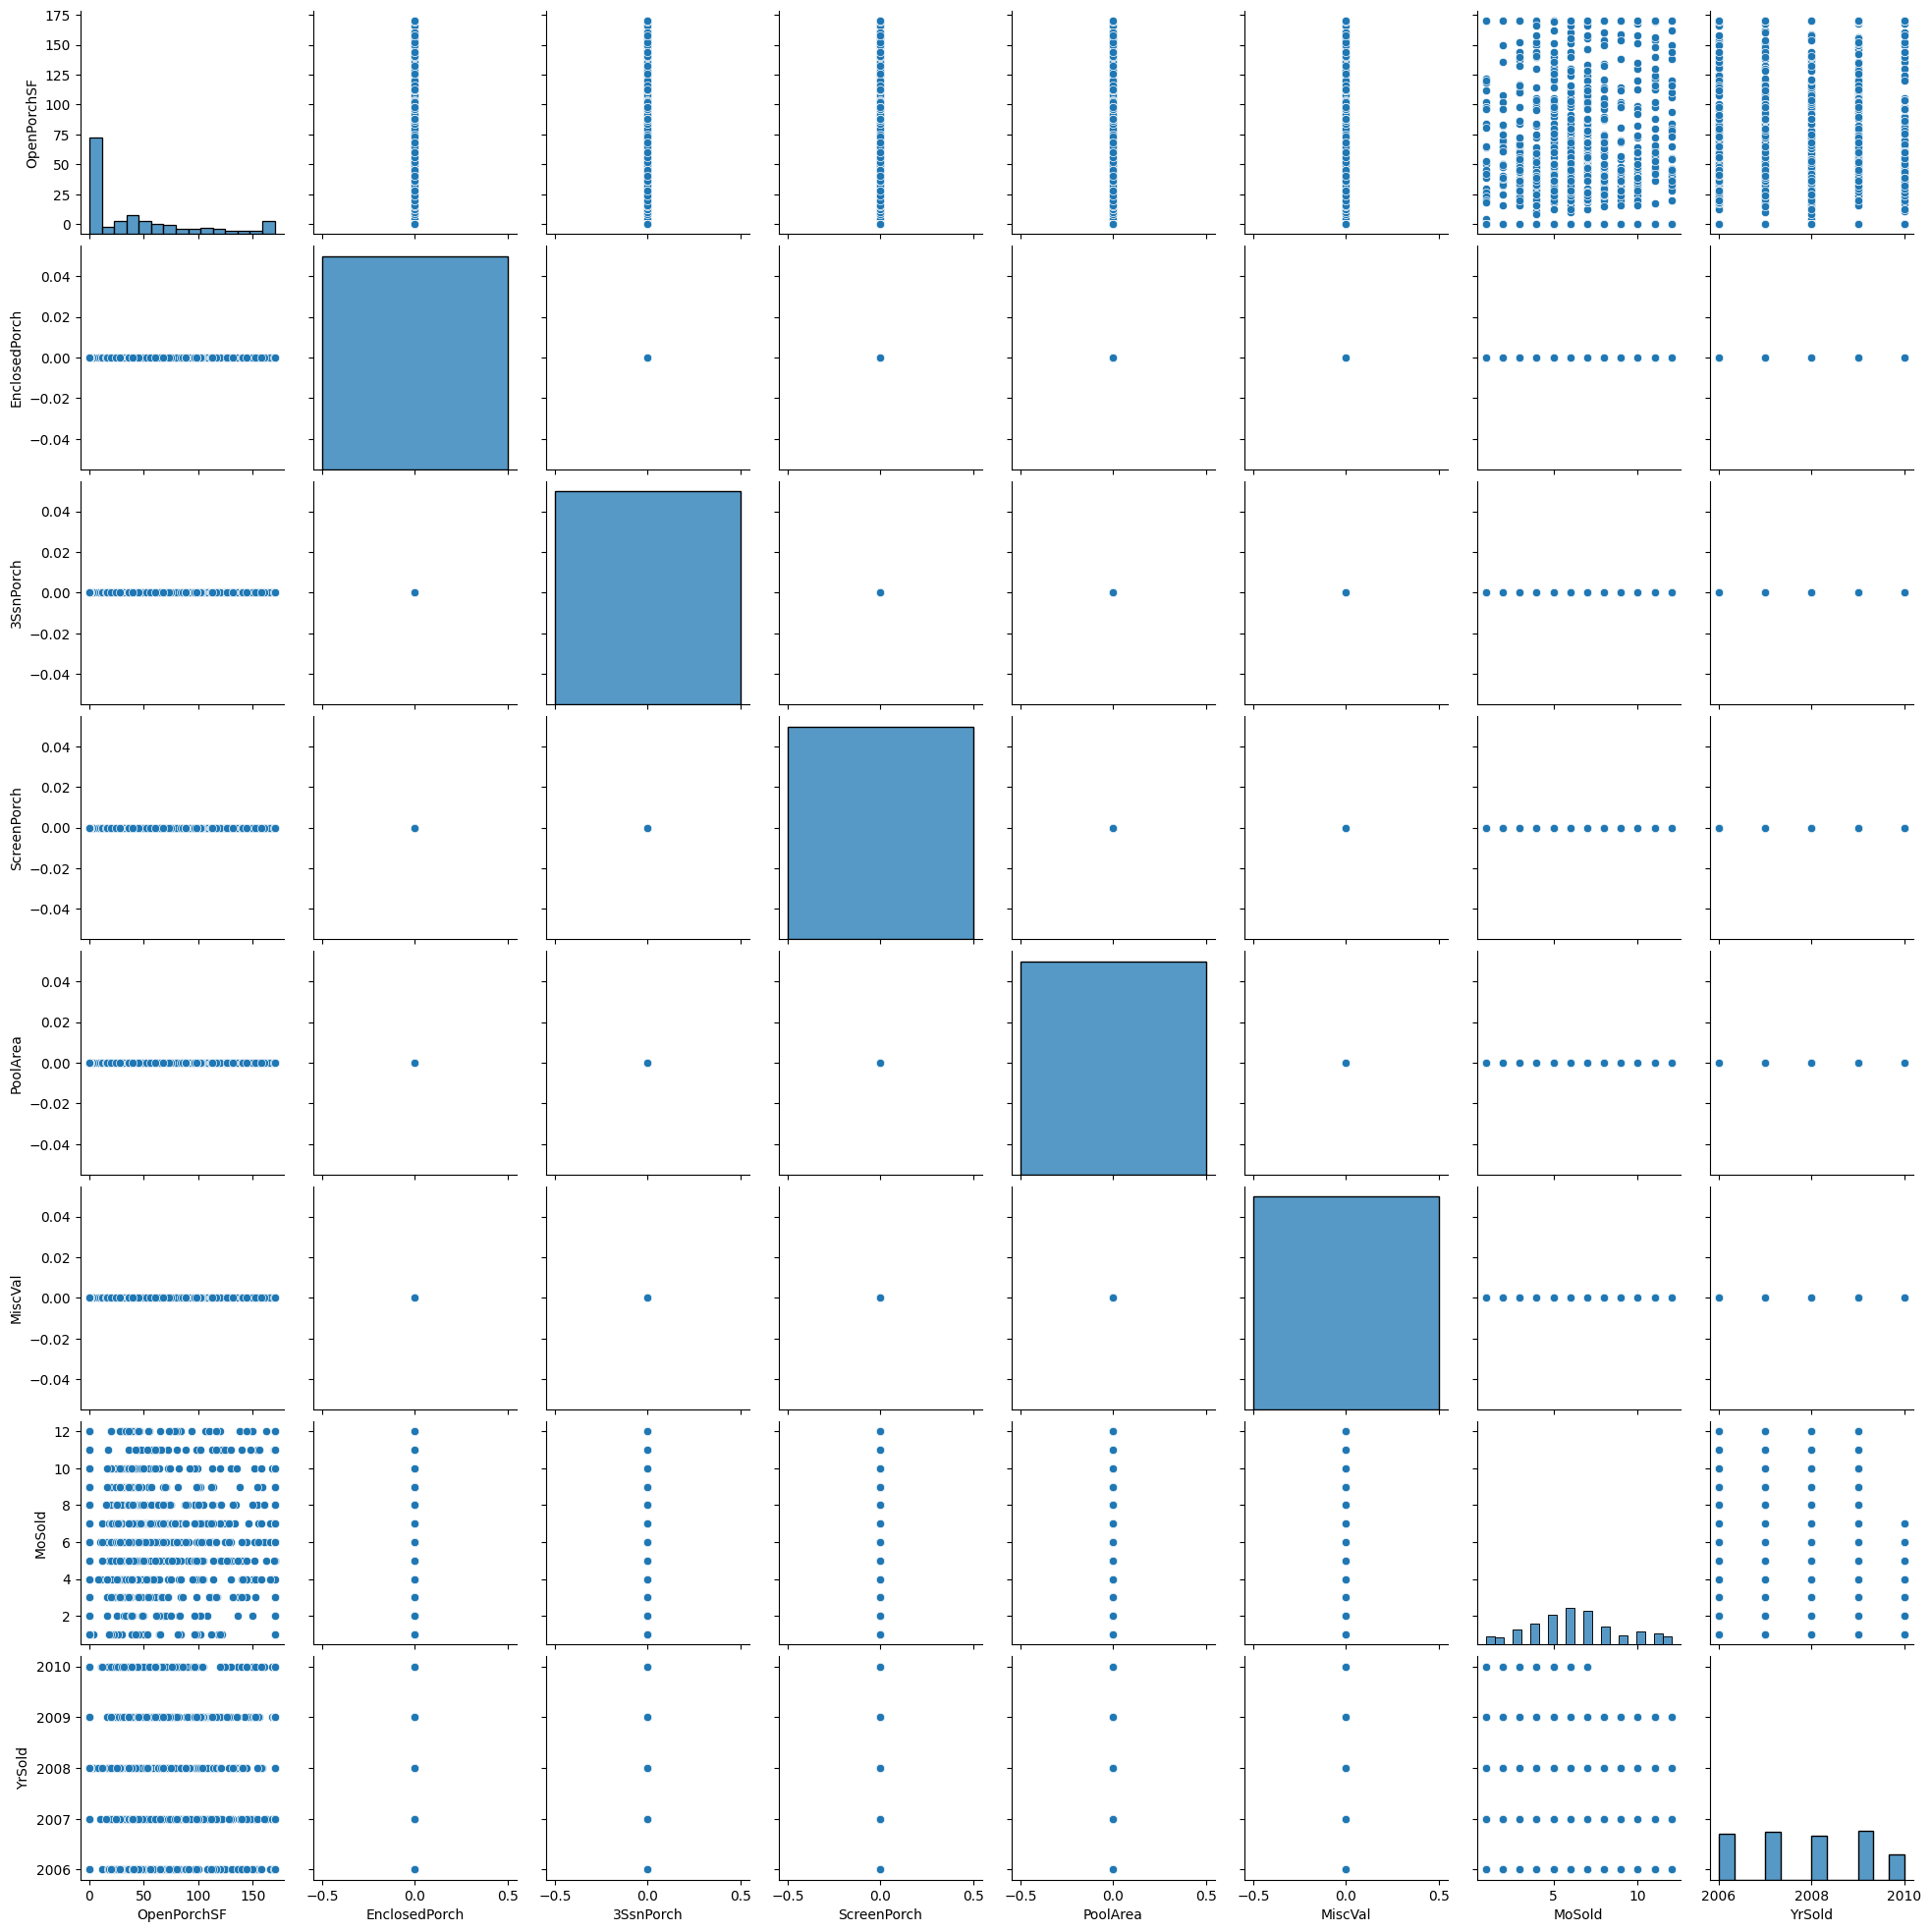

In [20]:
lin = np.linspace(0,len(df_train_num.columns),math.floor(len(df_train_num.columns)/6))
for i in range(len(lin)-1):
    columns = df_train_num.columns[int(lin[i]):int(lin[i+1])]
    sns.pairplot(df_train_num[columns])
plt.show()

To better illustrate the behavior of the variables, let's look at the density plots for each one.

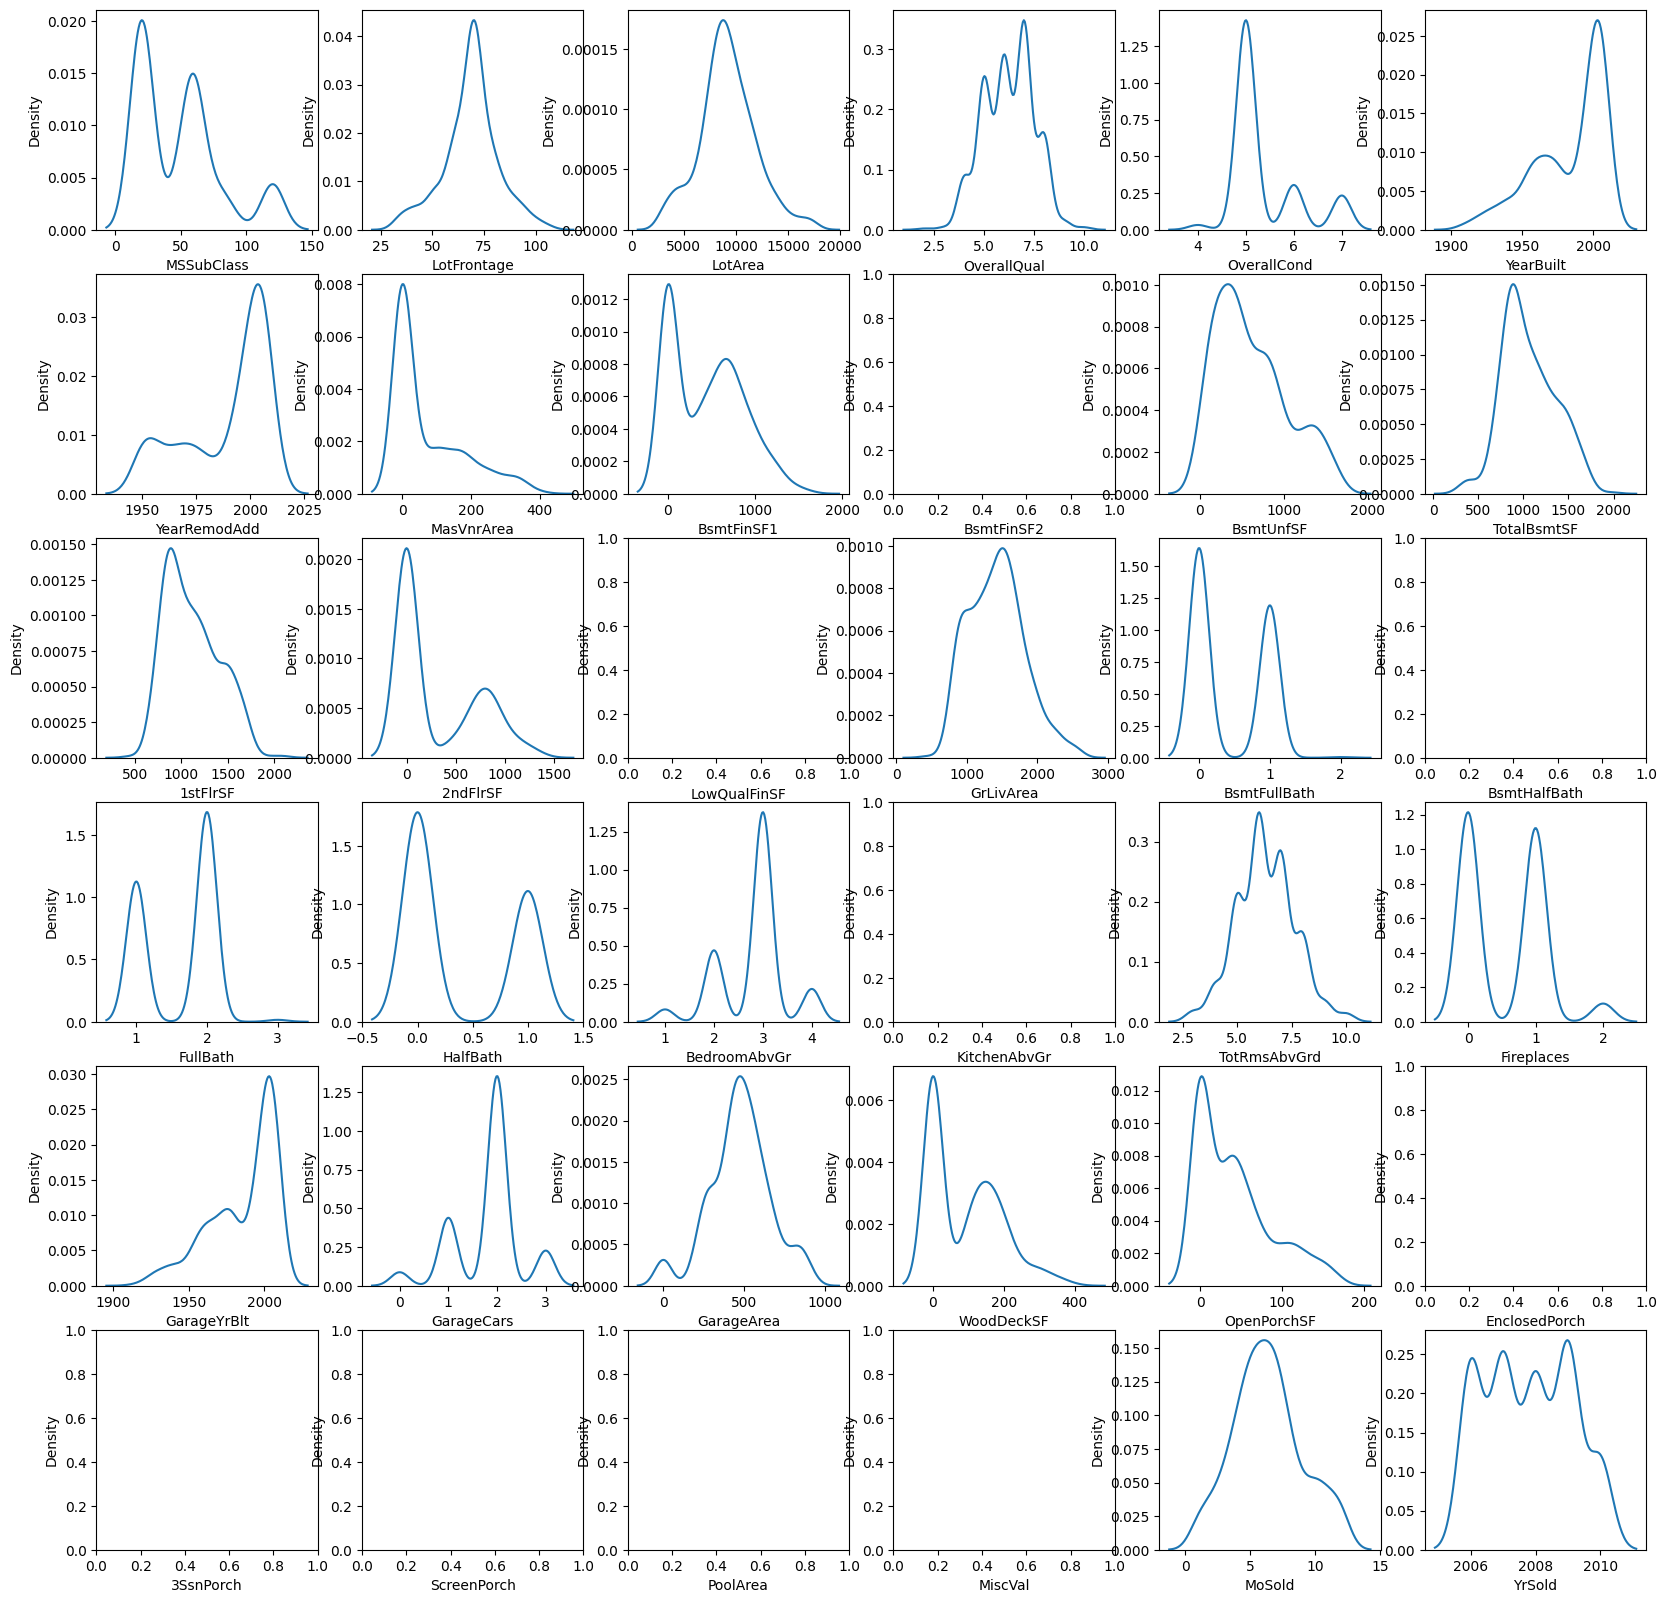

In [21]:
fig,ax = plt.subplots(6,6,figsize=(20,20))
column_matrix = np.array(np.array(list(df_train_num.columns))).reshape(6,6) # esta matriz se usa para obtener los índices del subplot
for i in range(column_matrix.shape[0]):
    for j in range(column_matrix.shape[1]):
        sns.kdeplot(df_train_num[column_matrix[i,j]],ax=ax[i,j])

To better illustrate the behavior of the variables, let's look at the density plots for each one.

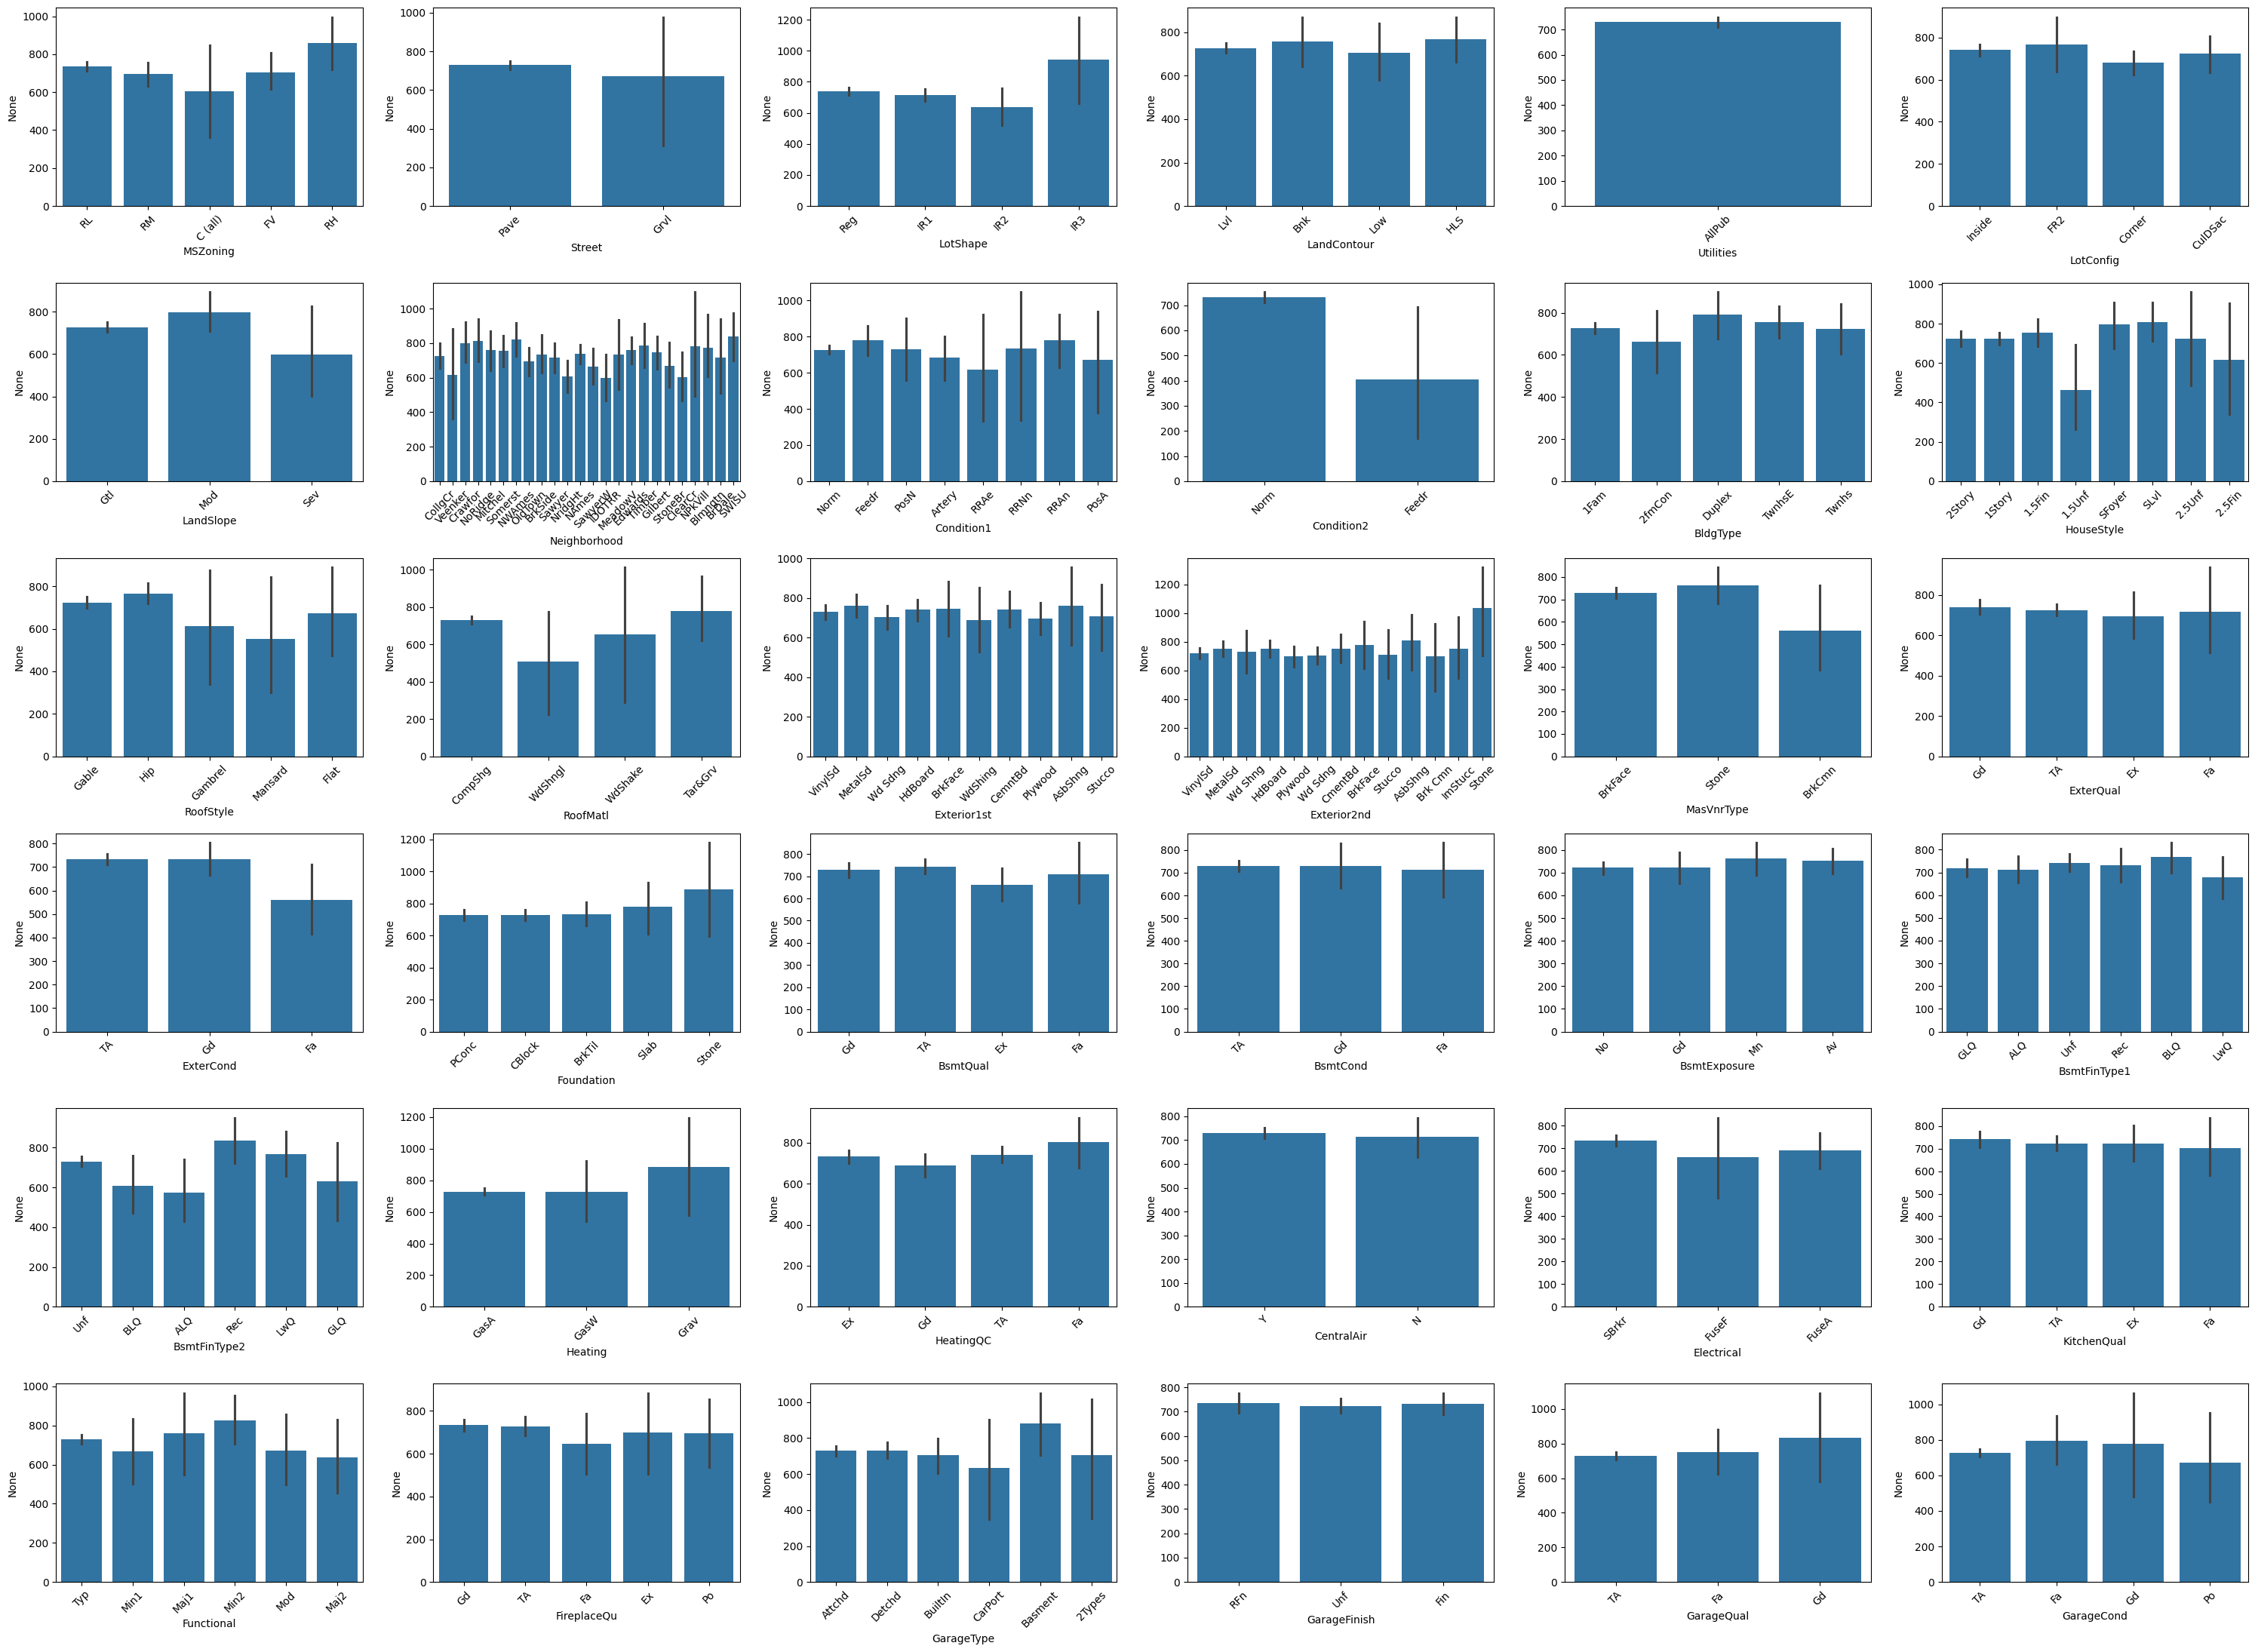

In [22]:
fig,ax = plt.subplots(6,6,figsize=(30,22))

column_matrix = np.array(np.array(list(df_train_cat.columns[:36]))).reshape(6,6) # esta matriz se usa para obtener los índices del subplot
for i in range(column_matrix.shape[0]):
        for j in range(column_matrix.shape[1]):
            sns.barplot(y=df_train_cat[column_matrix[i,j]].index,x=df_train_cat[column_matrix[i,j]],ax=ax[i,j])
            ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=45)
plt.tight_layout()

**Scaling for Continuous Variables**

Continuous variables can have very different scales, which can affect the accuracy and efficiency of the model. Therefore, we will apply [standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which involves subtracting the mean and dividing by the standard deviation \( z = \frac{x - \mu}{\sigma} \). This is implemented in **StandardScaler** in the **scikit-learn** library.


In [23]:
def escalamiento(df):
    scale= StandardScaler()
    scaled_df = scale.fit_transform(df)
    df = pd.DataFrame(scaled_df,columns=df.columns)
    return df

df_train_num = escalamiento(df_train_num)
df_test_num = escalamiento(df_test_num)

**Encoding for Categorical Variables**

Many models do not support categorical variables in their implementation. Therefore, we need an encoding technique that converts categorical variables into dummies, meaning that for each column, new columns will be generated—one for each category within it. These new columns will be composed of 0s and 1s, where 1 indicates that the entry matches the category now representing the column. We achieve this using the [One-Hot Encoding](https://www.brutalk.com/es/noticias/brutalk-blog/ver/por-que-one-hot-encode-data-en-machine-learning-60471b11bb4df) method. First, we use the **Label Encoder** function to perform integer encoding (assigning an integer to each category), and then each of these categories will become a binary column in the dataset (1 if the entry at the corresponding index belongs to that category and 0 if not), using the **OneHotEncoder** function.


In [24]:
columnas_categoricas = df_train_cat.columns

def encoding(df):
    df_lenc = df.copy()
    dict_list = {}

    labelencoder = LabelEncoder() # labelencoder
    for col in df:
        df_lenc[col] = labelencoder.fit_transform(df_lenc[col])
        dict_list[col] = dict(zip(df_lenc[col],df[col]))

    # one-hot-encoder
    enc = OneHotEncoder()
    enc_df = pd.DataFrame()
    for col in df.columns:
        temp = pd.DataFrame(enc.fit_transform(df_lenc[[col]]).toarray())
        # recuperar los nombres de las categorías
        temp.rename(columns=dict(zip(list(range(len(temp.columns))),[str(col)+'_'+str(dict_list[col][i]) for i in list(range(len(temp.columns)))])),inplace=True)
        enc_df = pd.concat([enc_df,temp],axis=1)
    return enc_df

df_train_cat = encoding(df_train_cat)
df_test_cat = encoding(df_test_cat)

Let's see how many columns remain in "train" and how many in "test," as it's important that they have the same number of columns when implementing the model.

In [25]:
print(df_train_cat.shape,df_test_cat.shape)

(1460, 197) (1459, 219)


There are more columns in `df_test_cat`, which may be because there were categories in the columns of `df_test_cat` before encoding that did not exist in `df_train_cat`. This could be due to how they were originally or due to different results in outlier treatment. These non-matching columns will be removed in the next cell.

In [26]:
columns = [col for col in df_test_cat.columns if col in df_train_cat.columns]
df_train_cat = df_train_cat[columns]
df_test_cat = df_test_cat[columns]

Finally, we'll name the dataset with all the explanatory variables (both numerical and categorical) "X" and the column with the target variable "y." Next, we'll use "train_test_split" to divide the total data into two subsets: training and testing, which we'll use to train and evaluate the models, respectively.

In [27]:
X = pd.concat([df_train_num,df_train_cat], axis=1)
y = df_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Models**

**Linear Regression**

We will start with a linear regression. First, we define the model, train it using the "fit" function and the training set, and then predict the target variable on the test subset. By comparing the prediction with the actual values of `y_test`, we can determine the model's accuracy using two different metrics. The first metric is R², where the model is more accurate the closer R² is to one. We also calculate the mean absolute error, which we divide by the mean of the actual values to convert it into a mean relative error.


In [29]:
# Imputar valores faltantes con la media de cada característica
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

# Hacer predicciones
LR_pred = LR.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, LR_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :", r2_score(y_test, LR_pred))
print('Mean relative error :', mean_absolute_error(y_test, LR_pred) / y_test.mean())

Mean Squared Error: 1742403221.6392694
R^2 : 0.7559762849124514
Mean relative error : 0.15418637347372344


**Decision Tree**

The accuracy of the linear regression is not very good, possibly because the structure of the relationships between the data is not approximately linear. Let's implement a decision tree:


In [30]:
dct = tree.DecisionTreeRegressor()
dct = dct.fit(X_train, y_train)
dct_pred = dct.predict((X_test))

mse = mean_squared_error(y_test, dct_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, dct_pred))
print('Mean relative error :',mean_absolute_error(y_test, dct_pred)/y_test.mean())

Mean Squared Error: 3543607511.1562657
R^2 : 0.5037174754125209
Mean relative error : 0.21075833583985165


**Random Forest**

The accuracy of the decision trees wasn't very good in this case either. Let's try a couple of ensemble methods based on trees to see if we can improve it.


In [31]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_pred =  RF.predict(X_test)

mse = mean_squared_error(y_test, RF_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, RF_pred))
print('Mean relative error :',mean_absolute_error(y_test, RF_pred)/y_test.mean())

Mean Squared Error: 1840125151.5449686
R^2 : 0.7422903205587591
Mean relative error : 0.15380923656668175


### Gradient Boosting

In [32]:
XGB = GradientBoostingRegressor().fit(X_train,y_train)
XGB_pred =  XGB.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, XGB_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, XGB_pred))
print('Mean relative error :',mean_absolute_error(y_test, XGB_pred)/y_test.mean())

Mean Squared Error: 1799702270.502412
R^2 : 0.7479515483871066
Mean relative error : 0.14873419754215556


Gradient Boosting (XGBoost)

"Gradient Boosting creates a series of decision trees where each tree attempts to correct the errors of the previous tree. It is very effective for predictive models."

In [33]:
import xgboost as xgb

# Crear y entrenar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, y_pred))
print('Mean relative error :',mean_absolute_error(y_test, y_pred)/y_test.mean())

Mean Squared Error: 1921964587.6441844
R^2 : 0.7308287007743259
Mean relative error : 0.14886045273857393


As we can see, both models have very high accuracy and a low relative error.

**Predictions**

We will use the two best-performing methods to predict the target variable in `df_test`. To do this, we will retrain the models using the entire `df_train` dataframe and then make the prediction.


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Crear un imputador que reemplace los NaN con la mediana
imputer = SimpleImputer(strategy='median')

# Crear un pipeline que primero imputa y luego ajusta el modelo
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', RandomForestRegressor())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir usando el pipeline
RF_prediction = pipeline.predict(X_test)



In [38]:
# Eliminar filas con NaN
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

X_test_clean = X_test.dropna()

# Ajustar el modelo con los datos limpios
RF = RandomForestRegressor().fit(X_train_clean, y_train_clean)
RF_prediction = RF.predict(X_test_clean)


In [35]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [40]:
XGB = GradientBoostingRegressor().fit(X_train_clean,y_train_clean)
XGB_prediction =  XGB.predict(X_test_clean)

In [41]:
xgb_model.fit(X_train_clean, y_train_clean)
# Hacer predicciones
xgb_prediction = xgb_model.predict(X_test_clean)

In [42]:
print("R^2 :",r2_score(XGB_prediction, RF_prediction))
print('Mean relative error :',mean_absolute_error(XGB_prediction, RF_prediction)/XGB_prediction.mean())

print("R^2 xgb:",r2_score(xgb_prediction, RF_prediction))
print('Mean relative error :',mean_absolute_error(xgb_prediction, RF_prediction)/xgb_prediction.mean())

print("R^2 xgb:",r2_score(XGB_prediction, xgb_prediction))
print('Mean relative error :',mean_absolute_error(XGB_prediction, xgb_prediction)/XGB_prediction.mean())

R^2 : 0.9403684785923776
Mean relative error : 0.06693751993096847
R^2 xgb: 0.9362257298274793
Mean relative error : 0.06765463718102459
R^2 xgb: 0.9518826910399827
Mean relative error : 0.058027077244048694


We can see that the predictions from both models are very similar, which is a very good sign. Next, let's plot some of these results:

**Predictions from XGB and RF**

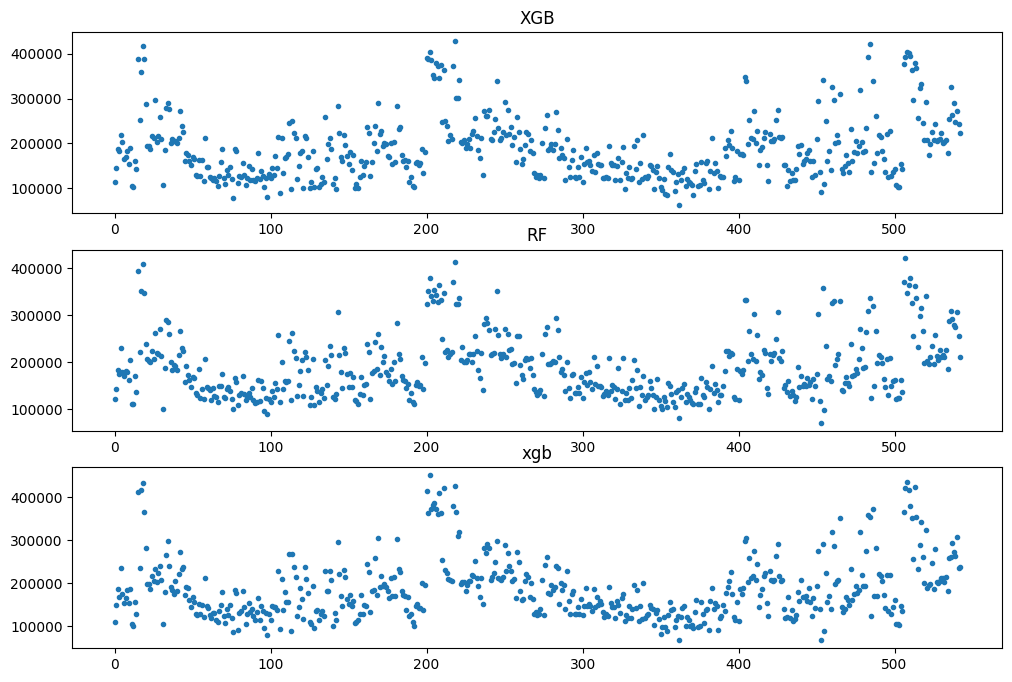

In [43]:
fig,ax = plt.subplots(3,1,figsize=(12,8))
ax[0].plot(XGB_prediction,'.')
ax[0].set_title('XGB')
ax[1].plot(RF_prediction,'.')
ax[1].set_title('RF')
ax[2].plot(xgb_prediction,'.')
ax[2].set_title('xgb')
plt.show()

**Relative Errors in Predictions and Previous Tests**

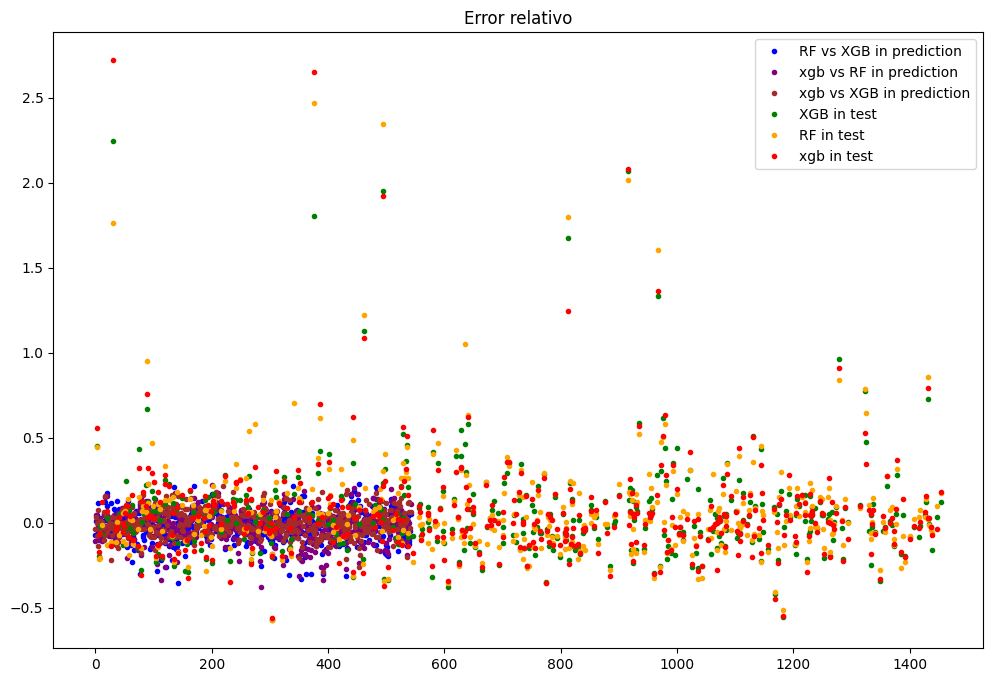

In [44]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
# Usar diferentes colores para cada conjunto de datos
rel_error = (XGB_prediction - RF_prediction) / XGB_prediction
ax.plot(rel_error, '.', color='blue', label='RF vs XGB in prediction')

rel_error = (xgb_prediction - RF_prediction) / xgb_prediction
ax.plot(rel_error, '.', color='purple', label='xgb vs RF in prediction')

rel_error = (xgb_prediction - XGB_prediction) / XGB_prediction
ax.plot(rel_error, '.', color='brown', label='xgb vs XGB in prediction')

rel_error = (XGB_pred - y_test) / y_test
ax.plot(rel_error, '.', color='green', label='XGB in test')

rel_error = (RF_pred - y_test) / y_test
ax.plot(rel_error, '.', color='orange', label='RF in test')

rel_error = (y_pred - y_test) / y_test
ax.plot(rel_error, '.', color='red', label='xgb in test')

# Título y leyenda
plt.title('Error relativo')
plt.legend()
plt.show()

**Prescription**

In this part of the examples, we will perform one of the simplest forms of prescription. We will see how to determine which variables have the most influence on the target variable and in what way they can be adjusted to increase or decrease house prices.

First, we use the **feature_importances_** function to find the influence of each explanatory variable on the target variable. This importance is based on how essential each column was in the decisions made by the trees that make up the model.


In [45]:
RF_importance = RF.feature_importances_
RF_importance = pd.DataFrame({'Variable':X_train.columns,'Importance':RF_importance})
RF_importance

Variable  Importance
0               MSSubClass    0.002669
1              LotFrontage    0.009935
2                  LotArea    0.010577
3              OverallQual    0.002274
4              OverallCond    0.003610
..                     ...         ...
224  SaleCondition_Abnorml    0.000391
225   SaleCondition_Alloca    0.000007
226   SaleCondition_Family    0.000303
227   SaleCondition_Normal    0.001151
228  SaleCondition_Partial    0.001623

[229 rows x 2 columns]

**Variable Importance According to Random Forest**

In the `RF_importance` variable column, we can see that the categorical variables still appear as the dummies we created, and the importance is given for each dummy. Ideally, we would like to have a single coefficient for each variable. In the following code, we will calculate this by averaging the importance of the dummies, using a weighted mean. The weights will be the number of entries that exhibit this characteristic, i.e., the number of ones in the dummy column.


In [46]:
def totalimportance(df_cat,columnas_categoricas,importance):
    imp_numericas = importance[:36]
    #Agrupa las importancias dadas por variable + categoría en una importancia para toda la variable tomando la importancia de cada una por las veces que aparece (lo cual actúa como "weight") entre el total de casos
    dic = {}
    for column in columnas_categoricas:
        dic[column] = 0
        for col in df_cat.columns:
            if column in col:
                cantidad_categoria = df_cat[col].value_counts()[1] # cantidad de entradas correspondientes a la categoría
                N = len(df_cat.index) # tamaño de la muestra
                indices =importance[importance['Variable']==col].index # indices del dataframe importance cuyos valores en Variable coinciden con las categorías de cada paso del ciclo
                importancia_categoria = importance.loc[indices,'Importance'].values #Importancia de la categoría en cuestión
                dic[column] += importancia_categoria * cantidad_categoria/N*100 # Construcción de la importancia de toda variable sumando la importancia de sus categorías multiplicada por los pesos conformados por (cantidad de entradas en la categoría)/(total de la muestra)

    total_importance = pd.DataFrame(dic).transpose().reset_index().rename(columns={'index':'Variable',0:'Importance'})
    total_importance = pd.concat([total_importance,imp_numericas],axis=0)
    total_importance = total_importance.sort_values(by=['Importance'],ascending=False)
    total_importance = round(total_importance,4)
    return total_importance

total_importance = totalimportance(df_train_cat,columnas_categoricas,RF_importance)
total_importance

Variable  Importance
17     ExterQual     20.3023
20      BsmtQual      2.1072
33  GarageFinish      1.5545
29   KitchenQual      1.5143
10      BldgType      0.7621
..           ...         ...
31   ScreenPorch      0.0000
32      PoolArea      0.0000
33       MiscVal      0.0000
16    MasVnrType      0.0000
14  LowQualFinSF      0.0000

[75 rows x 2 columns]

Using the Plotly library, let's create an interactive bubble chart that can display the information we found earlier.

In [47]:
import plotly.graph_objects as go
import plotly.express as px

df = total_importance.copy()

hover_text = []
bubble_size = []

for index, row in df.iterrows():
    hover_text.append(('Variable: {Variable}<br>'+
                      'Importancia_RF: {Importance}<br>'.format(Variable=row['Variable'],
                            Importance=row['Importance']
                                          )))
    bubble_size.append(10*row['Importance'])

df['text'] = hover_text
df['size'] = bubble_size
sizeref = 2.*max(df['size'])/(100**2)


# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=df['Variable'], y=df['Importance'],
    #    name=continent_name, text=continent['text'],
     #   marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Variables & Importancia',
    xaxis=dict(
        title='index',
        gridcolor='white',
#        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Importance',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

**Regression Coefficients**

The information we reviewed above allows us to identify which variables should be modified to influence the model's decision. However, it doesn't tell us in which direction or by how much they should be changed. This can be determined using regression coefficients. The issue is that the linear regression model did not have good accuracy, so the coefficients may not be very reliable.

We'll use the following technique: convert our target variable into a binary one, where 1 indicates that the price is above the median and 0 otherwise. Next, we'll retrain the model using **logistic regression**. Its accuracy should be calculated using the **accuracy_score** function from **metrics**.


In [48]:
med = y.median()
for i in y.index:
    if y[i] > med:
        y[i] = 1
    else:
        y[i] = 0

In [54]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

log = LogisticRegression()
log = log.fit(X_train,y_train)
log_pred = log.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, log_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Crear un imputador que reemplace los NaN con la mediana
imputer = SimpleImputer(strategy='median')

# Crear un pipeline que primero imputa y luego ajusta el modelo
pipeline = Pipeline([
    ('imputer', imputer),
    ('logistic_regression', LogisticRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir usando el pipeline
log_pred = pipeline.predict(X_test)

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test, log_pred))

Accuracy: 0.9018264840182648


In [56]:
# Eliminar filas con NaN
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

X_test_clean = X_test.dropna()

# Ajustar el modelo con los datos limpios
log = LogisticRegression().fit(X_train_clean, y_train_clean)
log_pred = log.predict(X_test_clean)

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test[X_test_clean.index], log_pred))

Accuracy: 0.8509316770186336


In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # Necesario para usar el modelo
from sklearn.ensemble import HistGradientBoostingClassifier

# Ajustar el modelo que maneja NaN de forma nativa
model = HistGradientBoostingClassifier().fit(X_train, y_train)

# Predecir usando el modelo
log_pred = model.predict(X_test)

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test, log_pred))

Accuracy: 0.9178082191780822


The accuracy has improved, so now it's time to obtain the regression coefficients. We'll plot the largest coefficients in absolute value, which represent the variables with the most positive or negative influence, on a bar chart.

In [58]:
log_coef = log.coef_.flatten()
log_coef = pd.DataFrame({'Variable':X.columns,'Log_coef':log_coef})
log_coef = log_coef.sort_values(by=['Log_coef'],ascending=False)
log_coef

Variable  Log_coef
72    Neighborhood_NWAmes  1.296904
64   Neighborhood_Crawfor  1.153996
157       BsmtExposure_Gd  1.129271
226  SaleCondition_Family  1.071863
205      GarageFinish_Fin  0.929404
..                    ...       ...
97        BldgType_TwnhsE -0.922429
207      GarageFinish_Unf -0.935814
103     HouseStyle_SFoyer -0.945127
65   Neighborhood_Edwards -0.971745
76     Neighborhood_SWISU -1.000232

[229 rows x 2 columns]

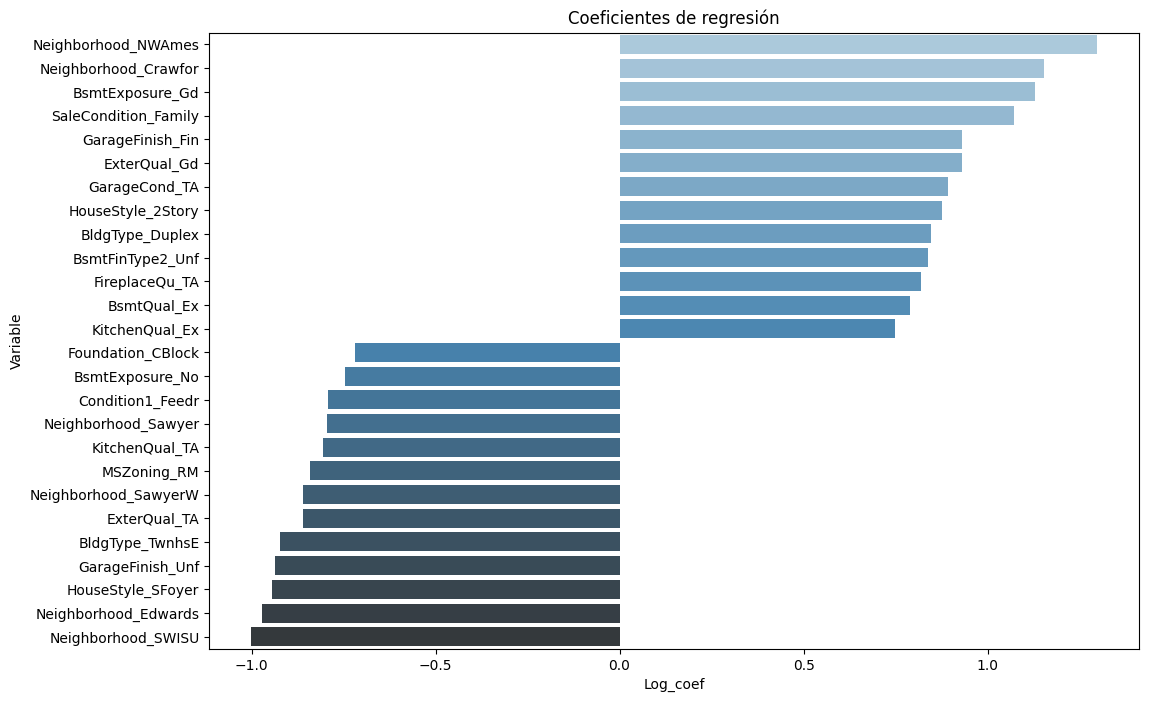

In [59]:
log_coef_plot = log_coef[abs(log_coef['Log_coef'])>0.7]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(y=log_coef_plot['Variable'],x=log_coef_plot['Log_coef'],data=log_coef_plot,palette="Blues_d")
plt.title('Coeficientes de regresión')
plt.show()

Neural Networks (TensorFlow/Keras)
Neural networks are more complex models that can capture non-linear relationships in the data, but they require more time to train.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (292, 229)
y_test shape: (292,)


In [62]:
print(f'y_pred shape: {y_pred.shape}')

y_pred shape: (438,)


In [63]:
import tensorflow as tf
from tensorflow.keras import layers

# Definir el modelo de red neuronal
nn_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Hacer predicciones
y_pred = nn_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, y_pred))
print('Mean relative error :',mean_absolute_error(y_test, y_pred)/y_test.mean())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Input contains NaN.

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Remover NaNs o infinitos de las predicciones
y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=0.0, neginf=0.0)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :", r2_score(y_test, y_pred))
print('Mean relative error:', mean_absolute_error(y_test, y_pred)/y_test.mean())

Mean Squared Error: 0.4486301369863014
R^2 : -0.813664596273292
Mean relative error: 1.0


In [65]:
# Aplanar y_pred si es necesario
y_pred = y_pred.flatten()

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :", r2_score(y_test, y_pred))
print('Mean relative error:', mean_absolute_error(y_test, y_pred)/y_test.mean())

Mean Squared Error: 0.4486301369863014
R^2 : -0.813664596273292
Mean relative error: 1.0


In [66]:
print(y_test.shape, y_pred.shape)
print(type(y_test), type(y_pred))

(292,) (292,)
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [67]:
print(np.isnan(y_pred).sum(), np.isinf(y_pred).sum())

0 0


**Conclusions**

The Crawford neighborhood is the variable with the greatest impact on whether the house price is above the median. The next most significant factor is the living area, meaning that the larger it is, the higher the cost. Certain classifications within MSZoning, the zoning classification, are also important to consider; some classifications have a positive influence, while others have a negative impact.

Overall, by analyzing the regression coefficients, we can determine which characteristics can be adjusted to influence the house price. While some factors cannot be changed after construction, others can be modified. Even those that cannot be changed can serve as a guide for potential investors.
